In [1]:

import os
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)
print("Working directory:", os.getcwd())

from tools import get_Tapes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Working directory: c:\Users\wwden\OneDrive\Documents\GitHub\dsmp-2024-group-19


In [2]:
# import tapes data
tapes = get_Tapes(125)

Opening UoB_Set01_2025-01-02tapes.csv
Opening UoB_Set01_2025-01-03tapes.csv
Opening UoB_Set01_2025-01-06tapes.csv
Opening UoB_Set01_2025-01-07tapes.csv
Opening UoB_Set01_2025-01-08tapes.csv
Opening UoB_Set01_2025-01-09tapes.csv
Opening UoB_Set01_2025-01-10tapes.csv
Opening UoB_Set01_2025-01-13tapes.csv
Opening UoB_Set01_2025-01-14tapes.csv
Opening UoB_Set01_2025-01-15tapes.csv
Opening UoB_Set01_2025-01-16tapes.csv
Opening UoB_Set01_2025-01-17tapes.csv
Opening UoB_Set01_2025-01-20tapes.csv
Opening UoB_Set01_2025-01-21tapes.csv
Opening UoB_Set01_2025-01-22tapes.csv
Opening UoB_Set01_2025-01-23tapes.csv
Opening UoB_Set01_2025-01-24tapes.csv
Opening UoB_Set01_2025-01-27tapes.csv
Opening UoB_Set01_2025-01-28tapes.csv
Opening UoB_Set01_2025-01-29tapes.csv
Opening UoB_Set01_2025-01-30tapes.csv
Opening UoB_Set01_2025-01-31tapes.csv
Opening UoB_Set01_2025-02-03tapes.csv
Opening UoB_Set01_2025-02-04tapes.csv
Opening UoB_Set01_2025-02-05tapes.csv
Opening UoB_Set01_2025-02-06tapes.csv
Opening UoB_

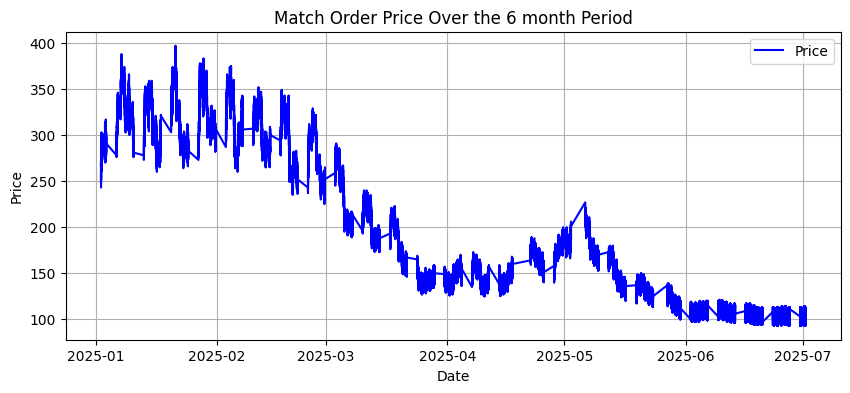

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Concatenate tapes
merged_tapes = pd.concat(tapes, axis=0)

# Plot
plt.figure(figsize=(10, 4))  # Adjust figure size
plt.plot(merged_tapes.index, merged_tapes['Price'], label='Price', color='blue')  # Plotting with blue color
plt.title("Match Order Price Over the 6 month Period")  # Title
plt.xlabel("Date")  # X-axis label
plt.ylabel("Price")  # Y-axis label
plt.grid(True)  # Adding gridlines
plt.legend()  # Adding legend if multiple lines
plt.show()


C:\Users\wwden\AppData\Local\Temp\ipykernel_4704\2202065962.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  merged_tapes.hist(bins=20, ax=ax)


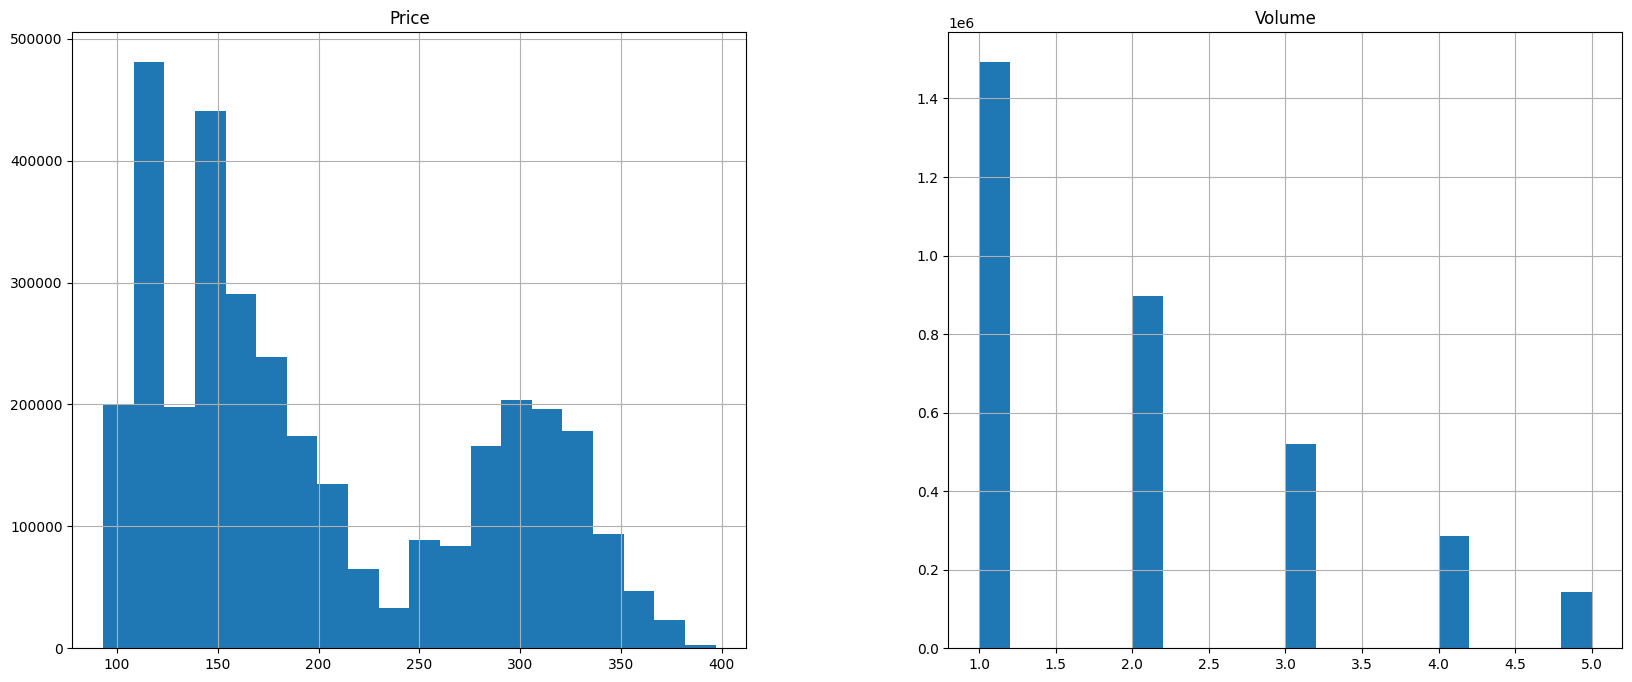

In [10]:
# look at distribution of price and volume
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the histogram on the axes
merged_tapes.hist(bins=20, ax=ax)
plt.show()

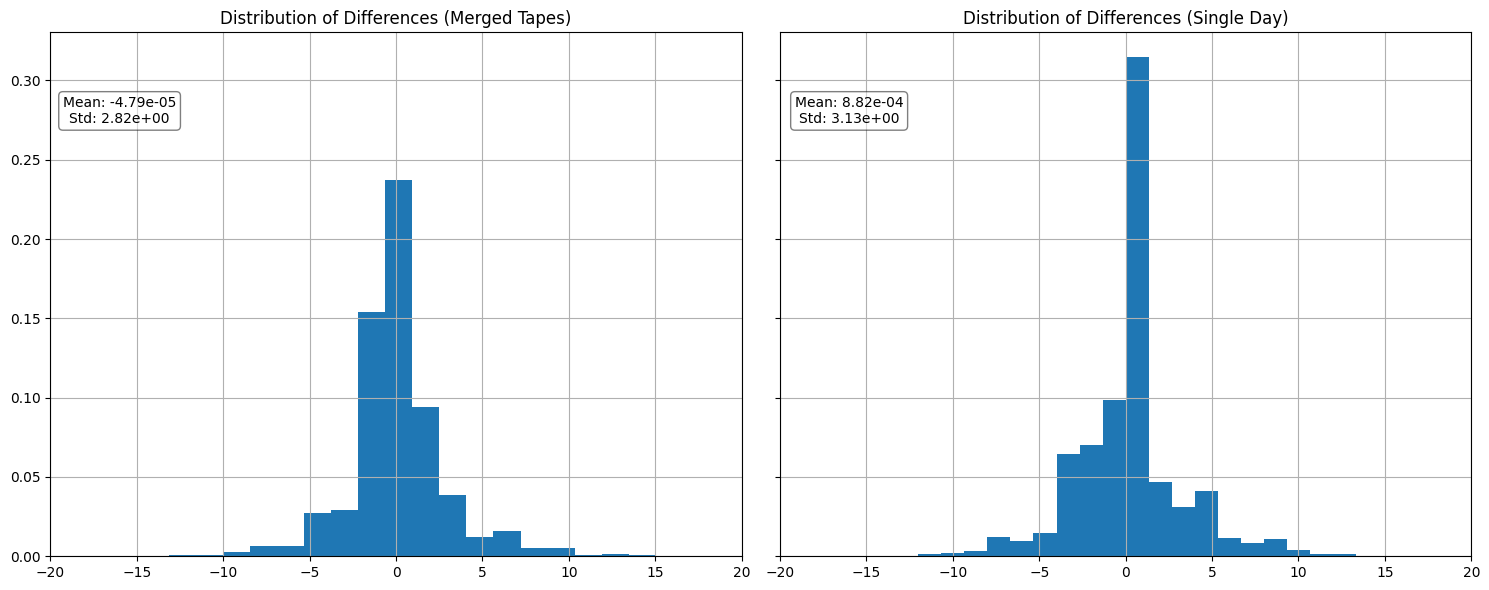

In [11]:
import matplotlib.pyplot as plt

# Assuming merged_tapes and tapes are your DataFrames or Series containing the data
# Check if merged_tapes and tapes actually contain data

# Define the number of bins
num_bins = 30
x_lim = 20

# Create a figure and axes objects with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6), sharey=True)  # Set sharey=True to share y-axis

# Plot the histogram of differences in the first subplot
merged_tapes["diff"] = merged_tapes["Price"].diff(1)
mean_diff = merged_tapes["diff"].mean()
std_diff = merged_tapes["diff"].std()
merged_tapes["diff"].hist(bins=num_bins, density=True, ax=axs[0])
axs[0].set_title(f'Distribution of Differences (Merged Tapes)')
axs[0].set_xlim([-x_lim, x_lim])  # Set the same x-axis limits for both subplots
axs[0].annotate(f'Mean: {mean_diff:.2e}\nStd: {std_diff:.2e}', xy=(0.1, 0.85), xycoords='axes fraction',
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


# Plot the histogram of differences for a single day in the second subplot
day = 0  # Change this to select a different day
mean_diff_day = tapes[day]["Price"].diff(1).mean()
std_diff_day = tapes[day]["Price"].diff(1).std()
tapes[day]["Price"].diff(1).hist(bins=num_bins, density=True, ax=axs[1])
axs[1].set_title('Distribution of Differences (Single Day)')
axs[1].set_xlim([-x_lim, x_lim])  # Set the same x-axis limits for both subplots
axs[1].annotate(f'Mean: {mean_diff_day:.2e}\nStd: {std_diff_day:.2e}', xy=(0.1, 0.85), xycoords='axes fraction',
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))


# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
merged_tapes["Price"].describe()

count    3.340501e+06
mean     2.005110e+02
std      8.010002e+01
min      9.300000e+01
25%      1.360000e+02
50%      1.720000e+02
75%      2.840000e+02
max      3.970000e+02
Name: Price, dtype: float64

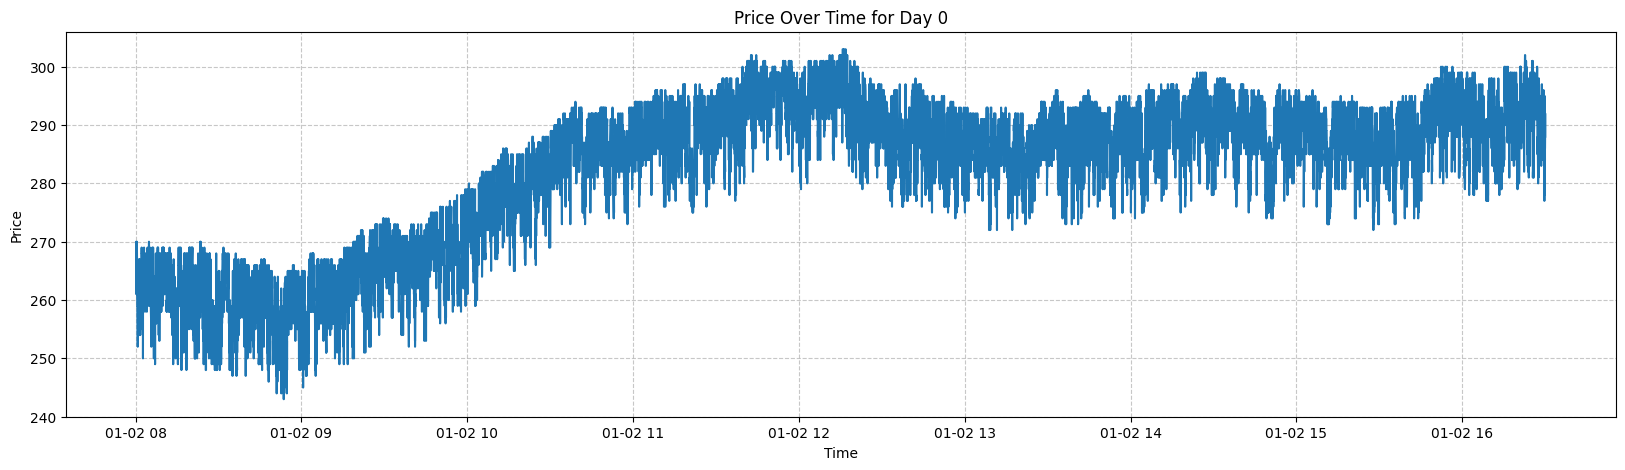

In [13]:
plt.figure(figsize=(20, 5))
plt.plot(tapes[0].index, tapes[0]["Price"],label='Price')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Over Time for Day 0')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

C:\Users\wwden\AppData\Local\Temp\ipykernel_4704\3825336406.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  resampled_df["Price"] = resampled_df["Price"].fillna(method='ffill')


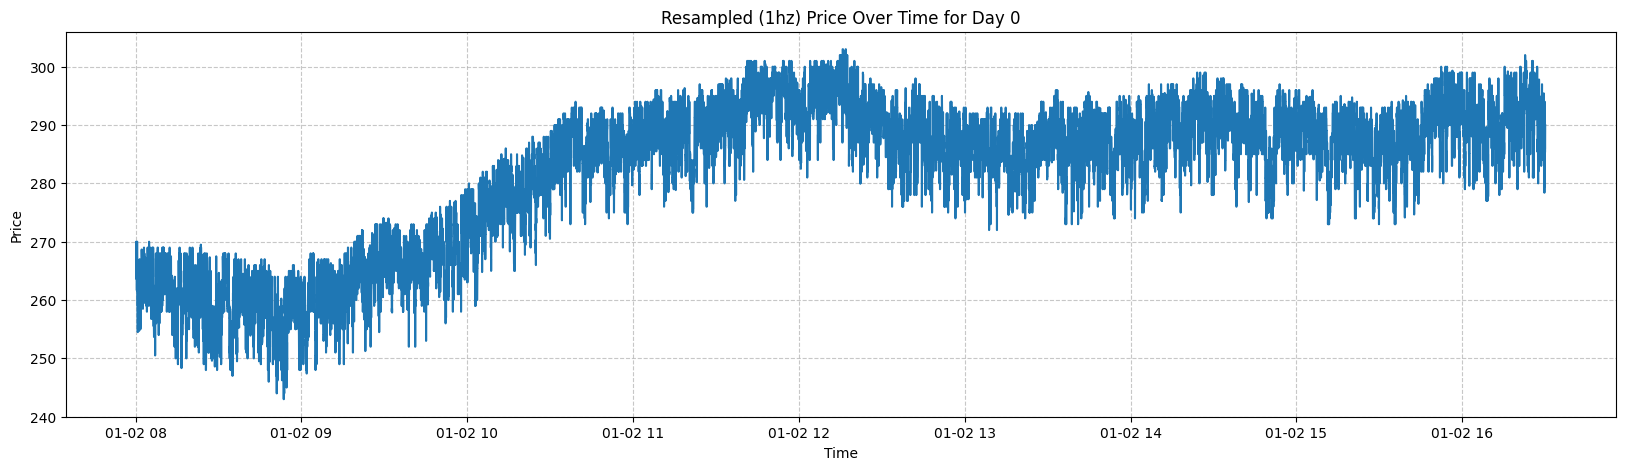

In [14]:
resampled_df = tapes[0]
resampled_df["Price*Volume"] = resampled_df["Price"] * resampled_df["Volume"]
resampled_df = resampled_df.resample("1s").sum()
resampled_df["Price"] = resampled_df["Price*Volume"] / resampled_df["Volume"]
resampled_df["Price"] = resampled_df["Price"].fillna(method='ffill')

plt.figure(figsize=(20,5))
plt.plot(resampled_df.index, resampled_df["Price"])
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Resampled (1hz) Price Over Time for Day 0')
plt.grid(True, linestyle='--', alpha=0.7)

In [15]:
tapes

[                         Price  Volume  Price*Volume
 combined_time                                       
 2025-01-02 08:00:10.881    267       1           267
 2025-01-02 08:00:11.067    269       1           269
 2025-01-02 08:00:11.222    267       2           534
 2025-01-02 08:00:12.338    270       2           540
 2025-01-02 08:00:13.733    267       3           801
 ...                        ...     ...           ...
 2025-01-02 16:29:58.085    287       2           574
 2025-01-02 16:29:58.085    288       2           576
 2025-01-02 16:29:59.108    292       1           292
 2025-01-02 16:29:59.728    290       1           290
 2025-01-02 16:29:59.728    288       1           288
 
 [23811 rows x 3 columns],
                          Price  Volume
 combined_time                         
 2025-01-03 08:00:01.767    281       1
 2025-01-03 08:00:09.734    283       1
 2025-01-03 08:00:16.027    278       1
 2025-01-03 08:00:16.027    282       3
 2025-01-03 08:00:16.027    2

In [29]:
half_hourly_df = tapes[0].resample("30min").sum().reset_index()

half_hourly_df["Volume"] = 0

for tap in tapes:
    half_hourly_df["Volume"] += tap.resample("30min").sum().reset_index()["Volume"] / (sum(tap["Volume"]))

half_hourly_df

,combined_time,Price,Volume,Price*Volume
0,2025-01-02 08:00:00,389182,7.201731,761682
1,2025-01-02 08:30:00,394139,7.336894,813063
2,2025-01-02 09:00:00,395888,7.333495,812128
3,2025-01-02 09:30:00,401321,7.370948,794767
4,2025-01-02 10:00:00,400727,7.351607,805802
5,2025-01-02 10:30:00,367428,7.333330,739794
6,2025-01-02 11:00:00,375655,7.353930,773233
7,2025-01-02 11:30:00,378851,7.342859,769124
8,2025-01-02 12:00:00,386491,7.376749,786771
9,2025-01-02 12:30:00,422936,7.369426,839452


Text(0, 0.5, 'Volume')

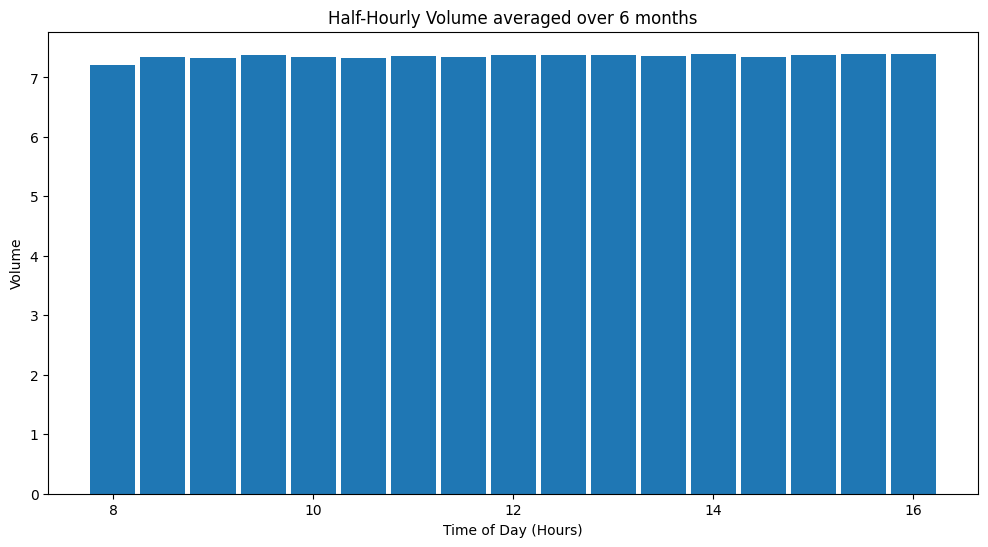

In [43]:
plt.figure(figsize=(12, 6))

plt.bar(tap.resample("30min").sum().index.hour + tap.resample("30min").sum().index.minute / 60, half_hourly_df["Volume"], width=0.45)

# Titles and labels
plt.title('Half-Hourly Volume averaged over 6 months')
plt.xlabel('Time of Day (Hours)')
plt.ylabel('Volume')

Index([ 8.0,  8.5,  9.0,  9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5,
       14.0, 14.5, 15.0, 15.5, 16.0],
      dtype='float64', name='combined_time')